### OpenCV 기본연산

#### 참고사항
현재 cv2는 numpy.ndarray을 이용하여 표현한다. 이러한 점에서 OpcenCV의 영상 내 자료값은 Numpy로서 치환하여 astype(), reshape()로 속성을 변경하고, 영상 화소를 y,x순으로 인덱스를 지정 접근하여 밝기 또는 컬러값을 접근한다.  
따라서 Numpy를 사전지식으로서 알고 있어야 OpenCV의 자료를 마음대로 가공하고 접근하여 연산처리가 가능하다.  

<a href="https://wjddyd66.github.io/dataanalysis/2019/07/07/Numpy.html">Numpy Post</a><br>

#### 필요한 라이브러리 임포트

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets 
import IPython.display as display
from ipywidgets import Layout, Button, Box, Layout, Image, IntSlider
import time

### 영상 속성과 화소 접근

OPenCV는 화소 자료형으로 표기하고, Numpy는 다중 채널 영상을 모양(shape)에 의해 표현한다.  

**Numpy와 OpenCV자료형**  

<table class="table">
	<tr>
		<td>구분</td>
		<td>numpy 자료형</td>
        <td>OpenCV 자료형</td>
	</tr>
    <tr>
		<td>8비트 unsigned 정수</td>
		<td>np.uint8</td>
        <td>cv2.CV_8U</td>
	</tr>    
    <tr>
		<td>8비트 signed 정수</td>
		<td>np.int8</td>
        <td>cv2.CV_8S</td>
	</tr>    
    <tr>
		<td>16비트 unsigned 정수</td>
		<td>np.uint16</td>
        <td>cv2.CV_16U</td>
	</tr>    
    <tr>
		<td>16비트 signed 정수</td>
		<td>np.int16</td>
        <td>cv2.CV_16S</td>
	</tr>    
    <tr>
		<td>32비트 signed 정수</td>
		<td>np.int32</td>
        <td>cv2.CV_32S</td>
	</tr>    
    <tr>
		<td>32비트 실수</td>
		<td>np.float32</td>
        <td>cv2.CV_32F</td>
	</tr>
    <tr>
		<td>64비트 실스</td>
		<td>np.float64</td>
        <td>cv2.CV_64F</td>
	</tr>

</table>
<br>

#### 모양, 자료형
- astype: 속성
- ndim: 차원
- shape: 크기
- dtype: 원소 자료형



In [2]:
print('Color Image')
img = cv2.imread('./data/lena.jpg')

print('img.ndim = ',img.ndim)
print('img.shape = ',img.shape)
print('img.dtype = ',img.dtype)

img = img.astype(np.int32)
print('img.dtype = ',img.dtype)

img = np.int64(img)
print('img dtype = ',img.dtype)
print('-'*20)

print('GrayScale Image')
img2 = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

print('img.ndim = ',img2.ndim)
print('img.shape = ',img2.shape)
print('img.dtype = ',img2.dtype)

img2 = img2.astype(np.int32)
print('img.dtype = ',img2.dtype)

img2 = np.int64(img2)
print('img dtype = ',img2.dtype)

Color Image
img.ndim =  3
img.shape =  (512, 512, 3)
img.dtype =  uint8
img.dtype =  int32
img dtype =  int64
--------------------
GrayScale Image
img.ndim =  2
img.shape =  (512, 512)
img.dtype =  uint8
img.dtype =  int32
img dtype =  int64


#### 모양 변경하기

In [3]:
img = cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)
print('img.shape = ',img.shape)

img = img.flatten()
print('img.shape = ',img.shape)

img = img.reshape(512,512,-1)
print('img shape = ',img.shape)

wImg = widgets.Image(layout = widgets.Layout(border="solid"),width="30%") 
display.display(wImg) 
tmpStream = cv2.imencode(".jpeg", img)[1].tostring() 
wImg.value = tmpStream

img.shape =  (512, 512)
img.shape =  (262144,)
img shape =  (512, 512, 1)


Image(value=b'', layout="Layout(border='solid')", width='30%')

#### 화소 접근: 그레이 스케일 영상
img를 Grayscale로 읽은 후 <code>img[100:400, 200:300]=0</code>을 통하여 img의 특정 값을 변경하였다.(ROI 지정)

In [4]:
img = cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)

img[100,200] = 0
print(img[100:110,200:210])

img[100:400,200:300]=0


wImg = widgets.Image(layout = widgets.Layout(border="solid"),width="30%") 
display.display(wImg) 
tmpStream = cv2.imencode(".jpeg", img)[1].tostring() 
wImg.value = tmpStream

[[  0 153 150 141 151 150 151 145 144 144]
 [146 144 151 155 148 149 146 148 145 145]
 [139 146 157 148 142 146 148 146 144 140]
 [145 153 146 135 139 147 149 148 140 138]
 [151 149 139 142 148 150 149 141 142 147]
 [151 144 143 151 152 150 139 138 145 144]
 [149 151 149 151 149 148 150 143 142 141]
 [159 149 145 146 150 151 152 144 132 137]
 [151 144 144 144 152 149 139 134 140 144]
 [142 142 151 151 143 142 133 143 146 136]]


Image(value=b'', layout="Layout(border='solid')", width='30%')

#### 화소접근2: 컬러영상
img를 Color로 읽은 후 <code>img[100:400, 200:300]=[0,0,255]</code>을 통하여 img의 특정 값을 변경하였다.  
GrayScale과 달리 img의 Channel이 3이므로 대입하는 값이 단일 값이 아닌 배열로서 3차원의 값을 대입하여야 한다.

In [5]:
img = cv2.imread('./data/lena.jpg')

img[100,200] = [0,0,255]
print(img[100,200:210])

img[100:400,200:300]=[0,0,255]


wImg = widgets.Image(layout = widgets.Layout(border="solid"),width="30%") 
display.display(wImg) 
tmpStream = cv2.imencode(".jpeg", img)[1].tostring() 
wImg.value = tmpStream

[[  0   0 255]
 [109 117 213]
 [113 115 208]
 [114 101 199]
 [121 116 207]
 [105 114 209]
 [112 113 212]
 [107 109 204]
 [117 108 200]
 [110 109 202]]


Image(value=b'', layout="Layout(border='solid')", width='30%')

#### 화소접근 3: 컬러영상 접근(채널 접근)
img를 Color로 읽은 후  
<code>img[100:400,200:300,0]=255</code><br>
<code>img[100:400,200:400,0]=255</code><br>
<code>img[100:400,200:500,0]=255</code><br>
을 통하여 img의 특정 값을 변경하였다.  
Image에 R,G,B로 접근하여 각각의 R,G,B의 값을 변경하였다.

In [6]:
img = cv2.imread('./data/lena.jpg')

img[100,200] = [0,0,255]
print(img[100,200:210])

img[100:400,200:300,0]=255 # B 채널 변경
img[100:400,300:400,1]=255 # G 채널 변경
img[100:400,400:500,2]=255 # R 채널 변경


wImg = widgets.Image(layout = widgets.Layout(border="solid"),width="30%") 
display.display(wImg) 
tmpStream = cv2.imencode(".jpeg", img)[1].tostring() 
wImg.value = tmpStream

[[  0   0 255]
 [109 117 213]
 [113 115 208]
 [114 101 199]
 [121 116 207]
 [105 114 209]
 [112 113 212]
 [107 109 204]
 [117 108 200]
 [110 109 202]]


Image(value=b'', layout="Layout(border='solid')", width='30%')

#### ROI에 의한 블록 평균 영상
하나의 Image를 선언한 Block의 개수로서 평균하는 Code이다.  
즉, Image를 원한는 pixel로 변환하는 Code이다.

In [7]:
img = cv2.imread('./data/lena.jpg')
#image와 같은 크기의 자료형 선언
dst = np.zeros(img.shape,dtype=img.dtype)

#dst의 이미지의 pixel개수를 선언
#if)N=16이면 img를 16 x 16 개의 pixel로 나누어서 dst에 대입한다.
N=16
height,width,_ = img.shape

#image를 나누기 위한 Parameter선언
h = height//N
w = width//N


for i in range(N):
    for j in range(N):
        x = i*h
        y = j*w
        roi = img[y:y+h,x:x+w]
        #Color 영상이므로 단일 값이 아닌 Channel 3개의값으로 평균을 내야 한다.
        dst[y:y+h,x:x+w] = cv2.mean(roi)[0:3]
        
wImg = widgets.Image(layout = widgets.Layout(border="solid"),width="30%") 
display.display(wImg) 
tmpStream = cv2.imencode(".jpeg", dst)[1].tostring() 
wImg.value = tmpStream

Image(value=b'', layout="Layout(border='solid')", width='30%')

### 마우스로 ROI 영역 지정

**OpenCv**의 Window를 띄울 수 없으므로 Jupyter Widget으로서 구성하였다.  

**Parameter**  
- im: 입력 Image
- selected_points: 마우스로 선택한 Mouse
- fig, ax: 결과 화면
- ka: fig(결과 화면)에 mpl_connect를 통하여 matplotlib Event를 걸었다. Click시에 onclick Method가 실행된다.
- disconnect_button: Component 클릭 시에, disconnect_mpl Method가 실행되고 연결한 Event를 해지하는 역할을 한다.

**Method**  
- __init__: 사용할 변수 선언
- poly_img: cv2.plotlines()를 통하여 사용자가 마우스로 지정한 Point를 연결하여 다각형으로 표시
- onclick: 사용자가 image를 클릭시에 좌표 값을 저장한다.

참조:<a href="https://medium.com/@khandelwalprateek01/how-to-select-roi-in-jupyter-notebook-309fe5185a54">khandelwalprateek01</a>

In [8]:
class bbox_select():
    %matplotlib notebook
    def __init__(self,im):
        self.im = im
        self.selected_points = []
        self.fig,ax = plt.subplots()
        self.img = ax.imshow(self.im.copy())
        self.ka = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        disconnect_button = widgets.Button(description="Disconnect mpl")
        display.display(disconnect_button)
        disconnect_button.on_click(self.disconnect_mpl)


        
    def poly_img(self,img,pts):
        pts = np.array(pts, np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img,[pts],True,(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)),7)
        return img

    def onclick(self, event):
    #display(str(event))
        self.selected_points.append([event.xdata,event.ydata])
        if len(self.selected_points)>1:
            self.fig
            self.img.set_data(self.poly_img(self.im.copy(),self.selected_points))
    def disconnect_mpl(self,_):
        self.fig.canvas.mpl_disconnect(self.ka)

In [9]:
im = plt.imread('./data/lena.jpg')

<IPython.core.display.Javascript object>


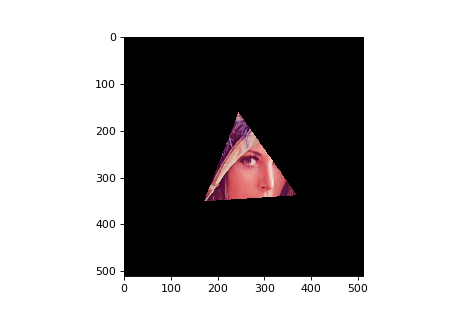

Button(description='Disconnect mpl', style=ButtonStyle())

In [10]:
bs = bbox_select(im)

In [11]:
bs.selected_points

[[244.0892228890728, 163.39646258423255],
 [171.09437373528323, 351.7702668520766],
 [368.8868682165194, 339.9969040853363]]

In [12]:
arr = np.array([bs.selected_points],'int')
mask = cv2.fillPoly(np.zeros(im.shape,np.uint8),arr,[1,1,1])
op = np.multiply(im,mask)
plt.imshow(op)

### 영상 복사
<code>numpy.copy()</code>를 이용하여 **원본 데이터를 그대로 유지하고, 원본 영상의 복사본에 라인, 사각형, 원 등을 표시한다.**  

#### 영상 복사

In [13]:
img = cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)

img2 = img.copy()
img2[100:400,200:300]=0

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 

wImg1.value = cv2.imencode(".jpeg", img)[1].tostring()
wImg2.value = cv2.imencode(".jpeg", img2)[1].tostring()

items = [wImg1, wImg2]
box = Box(children=items)

display.display(box)

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

### 영상 채널 분리와 병합
<code>cv.split(m[,mv])</code>은 원본 Image를 단일 Channel의 Image로서 분리한다.  
<code>cv.merge(mv[,dst])</code>은 단일 Channel의 Image를 합친다.

In [14]:
img = cv2.imread('./data/lena.jpg') 

box_layout = Layout(display='flex',
                    flex_flow='row',
                    border='solid',
                   width='100%',)

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")
wImg3 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")
wImg4 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")

items = [wImg1, wImg2, wImg3,wImg4]
box = Box(children=items)

dst = cv2.split(img)

tmpStream = cv2.imencode(".jpeg", dst[0])[1].tostring()
wImg1.value = tmpStream

tmpStream = cv2.imencode(".jpeg", dst[1])[1].tostring()
wImg2.value = tmpStream

tmpStream = cv2.imencode(".jpeg", dst[2])[1].tostring()
wImg3.value = tmpStream

merge_image = cv2.merge([dst[0],dst[1],dst[2]])
tmpStream = cv2.imencode(".jpeg", merge_image)[1].tostring()
wImg4.value = tmpStream

display.display(box) 

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

### 컬러 공간 변환
<code>cv.cvtColor(src,code[,dst[,dstCn]])</code>은 GRAY,HSV,YCrCb등의 다양한 컬러 공간 포멧으로 변환한다.  

**주요 컬러 변환 코드**  

<table class="table">
	<tr>
		<td>입력영상(src)</td>
		<td>변환 코드(code)</td>
        <td>출력영상(dst)</td>
	</tr>
    <tr>
		<td>BGR</td>
		<td>cv2.COLOR_BGR2GRAY</td>
        <td>GRAY</td>
	</tr>    
    <tr>
		<td>GRAY</td>
		<td>cv2.COLOR_GRAY2BGR</td>
        <td>BGR</td>
	</tr>
    <tr>
		<td>BGR</td>
		<td>cv2.COLOR_BGR2HSV</td>
        <td>HSV</td>
	</tr>
    <tr>
		<td>HSV</td>
		<td>cv2.COLOR_HSV2BGR</td>
        <td>BGR</td>
	</tr>
    <tr>
		<td>BGR</td>
		<td>cv2.COLOR_BGR2YCrCv</td>
        <td>YCrCv</td>
	</tr>
    <tr>
		<td>YCrCv</td>
		<td>cv2.COLOR_YCrCv2BGR</td>
        <td>BGR</td>
	</tr>

</table>
<br>

**색상 모델**  
<img src="https://t1.daumcdn.net/cfile/tistory/017E584E5199F0A436" style="cursor: pointer;max-width:100%;height:auto" width="550" height="117" filename="color_model.png" filemime="image/jpeg">

- Gray 모델은 색(color) 정보를 사용하지 않고 밝기 정보만으로 영상을 표현하는 것이다. 검정색 0부터 흰색 255까지 총 256단계의 밝기값(intensity)으로 영상 픽셀값을 표현한다.
- RGB 모델은 가장 기보적인 색상모델로서 색(color)을 Red, Green, Blue의 3가지 성분의 조합으로 생각하는 것이다. RGB 모델에서 검은색은 R=G=B=0, 흰색은 R=G=B=255, 빨강색은 R=255, G=B=0, 노란색은 R=G=255, B=0로 표현된다. R=G=B인 경우는 무채색인 Gray 색상이 된다. R, G, B 각각은 0 ~ 255 사이의 값을 가질 수 있기 때문에 RGB 색상 모델을 사용하면 총 256*256*256 = 16,777,216가지의 색을 표현할 수 있다.
- HSV 모델은 Hue(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현한다. Hue는 색조(예: 붉은색 계열인지 푸른색 계열인지, ...)를, Saturation은 그 색이 얼마나 선명한(순수한) 색인지를, Value는 밝기(intensity)를 나타낸다. HSV 모델은 우리가 색을 가장 직관적으로 표현할 수 있는 모델이며 또한 머리속에서 상상하는 색을 가장 쉽게 만들어낼 수 있는 모델이다. 영상처리/영상인식에서 HSV 모델을 사용할 때, H, S, V 각각은 0 ~ 255 사이의 값으로 표현된다. H 값은 색의 종류를 나타내기 때문에 크기는 의미가 없으며 단순한 인덱스(index)를 나타낸다. S 값은 0이면 무채색(gray 색), 255면 가장 선명한(순수한) 색임을 나타낸다. V 값은 작을수록 어둡고 클수록 밝은 색임을 나타낸다.
- YCbCr 모델은 RGB 색에서 밝기성분(Y)과 색차정보(Cb, Cr)를 분리하여 표현하는 색상모델이다. 위 5번째 그림은 위키페디아에 있는 그림으로  Y=128일 때의 CbCr 색상평면이다. 디지털 영상에서 Y, Cb, Cr은 각각 0 ~ 255 사이의 값을 가지며 Y가 커지면 위 그림이 전체적으로 밝아지고 Y가 작아지면 전체적으로 어두워진다. YCbCr 모델은 mpeg에서 사용되는 색상모델로서 인간의 눈이 밝기차에는 민감하지만 색차에는 상대적으로 둔감하다는 점을 이용해서 Y에는 많은 비트수(해상도)를 할당하고 Cb, Cr에는 낮은 비트수를 할당하는 방식으로 비디오를 압축한다. 따라서 비디오 데이터를 처리할 경우에 YCbCr 모델을 사용하면 별도의 색상변환을 하지 않아도 되는 장점을 갖는다. YCbCr 모델은 YUV 모델로도 불린다.

참조: <a href="https://darkpgmr.tistory.com/66">다크 프로그래머</a><br>

In [15]:
img = cv2.imread('./data/lena.jpg') 

box_layout = Layout(display='flex',
                    flex_flow='row',
                    border='solid',
                   width='100%',)

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")
wImg3 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")

items = [wImg1, wImg2, wImg3]
box = Box(children=items)

#GRAY
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
tmpStream = cv2.imencode(".jpeg", gray)[1].tostring()
wImg1.value = tmpStream

#yCrCv
yCrCv = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
tmpStream = cv2.imencode(".jpeg", yCrCv)[1].tostring()
wImg2.value = tmpStream

#HSV
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
tmpStream = cv2.imencode(".jpeg", hsv)[1].tostring()
wImg3.value = tmpStream

display.display(box) 

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

### 영상 크기 변환
<code>cv.resize(src,dsize[,dst[,fx[,fy[,interpolation]]]]])</code>: 입력 영상을 크기 변환하여 반환<br>
**parameter**  
- src: 입력 영상
- dsize: 출력 영상의 크기
- dst: 출력 영상
- fx: 가로 스케일
- fy: 세로 스케일
- interpolation: 보간법 ex)cv2.INTER_NEAREST, cv2.INTER_LINEAR ....

In [16]:
img = cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE) 

#Image 크기 320 x 240로 변환
dst = cv2.resize(img,dsize=(320,240))

#Image 크기 원본 영상의 가로 세로 각 1.5배로 변환
dst2 = cv2.resize(img,dsize=(0,0),fx=1.5, fy=1.2)

w1,h1 = dst.shape
w2,h2 = dst2.shape


wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width=w1, heigt=h1) 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width=w2, heigt=h2)



tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
wImg1.value = tmpStream

tmpStream = cv2.imencode(".jpeg", dst2)[1].tostring()
wImg2.value = tmpStream

display.display(wImg1,wImg2) 

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

### 영상 회전
<code>cv.rotate(src,rotateCode[,dst])</code>: 입력 영상 src를 크기 rotateCode에 따라 90의 배수로 회전<br>
**parameter**  
- rotateCode: 회전방식 ex)cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180 ....

In [17]:
img = cv2.imread('./data/lena.jpg') 

box_layout = Layout(display='flex',
                    flex_flow='row',
                    border='solid',
                   width='100%',)

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")

items = [wImg1, wImg2]
box = Box(children=items)

#시계 방향으로 90도 회전
img1 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
tmpStream = cv2.imencode(".jpeg", img1)[1].tostring()
wImg1.value = tmpStream

#반 시계 방향으로 90도 회전
img2 = cv2.rotate(img,cv2.ROTATE_90_COUNTERCLOCKWISE)
tmpStream = cv2.imencode(".jpeg", img2)[1].tostring()
wImg2.value = tmpStream

display.display(box) 

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

### 영상 어파인 변환

**동차좌표**  
동촤 좌표(Homogenous Coordinate)는 2차원상의 점의 위치를 2차원 벡터가 아닌 3차원 벡터로 표현하는 방법이다.  
<p>$$ x = \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$$</p>

마지막 원소가 1이 아닌 경우에는 1로 스케일링 시킨 것과 동일한 위치를 가르킨다.  
<p>$$ \begin{bmatrix} x \\ y \\ w \end{bmatrix} = \begin{bmatrix} x/w \\ y/w \\ 1 \end{bmatrix}$$</p>

동치좌표를 사용하는 예시를 한번 살펴보자.  
먼저 동치좌표를 사용하지 않고 선형 변환(Scaleing)후 평행하게 <span>$t=(t_x,t_y)$</span>만큼 이동하는 과정을 살펴보자.  
<p>$$ \begin{bmatrix} x\prime \\ y\prime \end{bmatrix} = A\begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} t_x \\ t_y \end{bmatrix} = A\begin{bmatrix} x \\ y \end{bmatrix} + t$$</p>

위의 과정을 동치 좌표를 사용하여 나타내면 매우 간단해 진다.  
<p>$$ \begin{bmatrix} x\prime \\ y\prime \\ 1 \end{bmatrix} = \begin{bmatrix} A && 0 && t_x \\ A && 0 && t_y \\ 0 && 0 && 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$$</p>

이렇게 하나의 3 x 3행렬로 3차원 좌표의 변환을 할 때, 이 3 x 3 행렬을 사영행렬(homography matrix)라고 불린다.  
<p>$$x\prime = Hx$$</p>

<br>

**회전 변환 행렬**  
회전 행렬같은 경우 매우 유명한 행렬이다.  
<p>$$H = \begin{bmatrix} cos\theta && -sin\theta \\ sin\theta && cos\theta \end{bmatrix}$$</p>

자세한 증명이 궁금하신 분은 아래 링크 참조  
<a href="https://ko.wikipedia.org/wiki/%ED%9A%8C%EC%A0%84%EB%B3%80%ED%99%98%ED%96%89%EB%A0%AC">회전 변환 행렬 증명</a>
<br>

**유사 변환**  
유사변환은 확대/축소(s), 회전(<span>$theta$</span>), 이동(t), 세가지 요소를 사용하여 이미지를 변환한다.  
위의서 증명한 **동차 좌표와 회전 변환 행렬**을 사용하게 되면 다음과 같이 나타낼 수 있다.  
<p>$$H = \begin{bmatrix} scos\theta && -ssin\theta && t_x\\ ssin\theta && scos\theta && t_y \\ 0 && 0 && 1\end{bmatrix}$$</p>

위의 식을 나타내는 OpenCV Code는 다음과 같다.  
<code>cv2.getRotationMatrix2D(center,angle,scale)</code><br>
**parameter**  
- center: 이미지의 중심 좌표
- angle: 회전 시키는 각도
- scale: 변환하려는 크기 비율


**원근변환**  
원근 변환은 핀홀 카메라 모형을 사용하여 2차원 이미지를 변환하는 방법이다.  
**자세한 방법은 모르겠다....**  
<a href="http://m.blog.daum.net/shksjy/235">shksjy 블로그</a>를 보고 나중에 공부하도록 하자

참조: <a href="https://datascienceschool.net/view-notebook/70820c6bcf154b8cb8161b4f93e4880d/">데이터 사이언스 스쿨</a><br>

In [18]:
img = cv2.imread('./data/lena.jpg')

rows,cols,channels = img.shape

M1 = cv2.getRotationMatrix2D((rows/2,cols/2),45,0.5)
M2 = cv2.getRotationMatrix2D((rows/2,cols/2),-45,1.0)

dst = cv2.warpAffine(img,M1,(rows,cols))
dst2 = cv2.warpAffine(img,M2,(rows,cols))

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width=w1, heigt=h1) 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width=w2, heigt=h2)



tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
wImg1.value = tmpStream

tmpStream = cv2.imencode(".jpeg", dst2)[1].tostring()
wImg2.value = tmpStream

display.display(wImg1,wImg2) 

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

### 영상 연산
OpenCV_Python은 영상을 numpy.ndarray로 표현하기 때문에 numpy연산을 사용할 수 있다. 

#### 사칙연산
**사칙연산 주요 함수**  
<table class="table">
	<tr>
		<td>함수</td>
		<td>설명</td>
    </tr>
    <tr>
		<td>cv2.add()</td>
		<td>dst = src1 + src2</td>
    </tr>
    <tr>
		<td>cv2.addWeighted()</td>
		<td>dst = saturate(src1*alpha + src2*bete + gamma)</td>
    </tr>
    <tr>
		<td>cv2.substract()</td>
		<td>dst = src1 - src2</td>
    </tr>
    <tr>
		<td>cv2.scaleAdd()</td>
		<td>dst = scale*src1 + src2</td>
    </tr>
    <tr>
		<td>cv2.multiply()</td>
		<td>dst = saturate(scale*src1*src2)</td>
    </tr>
    <tr>
		<td>cv2.divide()</td>
		<td>
        <ul>
            <li>dst = saturate(src1*scale/src2)</li>
            <li>dst = saturate(scale/src2)</li>
        </ul>
        </td>
    </tr>
    
</table>
<br>
참조 사이트:<a href="https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html">OpenCV 정식 홈페이지</a>

In [19]:
box_layout = Layout(display='flex',
                    flex_flow='row',
                    border='solid',
                   width='100%',)

img1 = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
img2 = np.zeros(shape=(512,512),dtype=np.int32)+100

dst1 = img1+img2
dst2 = cv2.add(img1,img2,dtype=cv2.CV_8U)

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")


tmpStream = cv2.imencode(".jpeg", dst1)[1].tostring()
wImg1.value = tmpStream

tmpStream = cv2.imencode(".jpeg", dst2)[1].tostring()
wImg2.value = tmpStream

items = [wImg1, wImg2]
box = Box(children=items)

display.display(box) 

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

#### 비트 연산

**비트연산 주요 함수**  
<table class="table">
	<tr>
		<td>함수</td>
		<td>설명</td>
    </tr>
    <tr>
		<td>cv2.bitwise_not()</td>
		<td>dst = -src1</td>
    </tr>
    <tr>
		<td>cv2.bitwise_and()</td>
		<td>dst = src1 $$ src2 if mask != 0</td>
    </tr>
    <tr>
		<td>cv2.bitwise_or()</td>
		<td>dst = src1 || src2 if mask != 0</td>
    </tr>
    <tr>
		<td>cv2.bitwise_xor()</td>
		<td>dst = !(src1 || src2) if mask != 0</td>
    </tr>
    
</table>
<br>


참조:<a href="https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html">OpenCV 정식 홈페이지</a><br>

In [22]:
src1 = cv2.imread('./data/lena.jpg')
src2 = cv2.imread('./data/opencv_logo.png')

box_layout = Layout(display='flex',
                    flex_flow='row',
                    border='solid',
                   width='100%',)

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%")
wlmg3 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%")

items1 = [wImg1, wImg2, wlmg3]
box1 = Box(children=items1)

wImg4 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%") 
wImg5 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%")
wImg6 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%")

wImg7 = widgets.Image(layout = widgets.Layout(border="solid"), width="30%", height="30%")

items2 = [wImg4, wImg5, wImg6]
box2 = Box(children=items2)

tmpStream = cv2.imencode(".jpeg", src2)[1].tostring()
wImg1.value = tmpStream

#1 Lena jpg에 ROI 설정
rows,cols,channels = src2.shape
roi = src1[0:rows,0:cols]

#2 threshold를 사용하여 원하는 모양과 배경을 나눔
gray = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(gray,160,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
tmpStream = cv2.imencode(".jpeg", mask)[1].tostring()
wImg2.value = tmpStream
tmpStream = cv2.imencode(".jpeg", mask_inv)[1].tostring()
wlmg3.value = tmpStream

#3 mask와 lena-ROI and연산 => 흰색 255, 흑 0 이므로 and시 흰색 부분에 lena-roi 입힘
src1_bg = cv2.bitwise_and(roi,roi,mask=mask)
tmpStream = cv2.imencode(".jpeg", src1_bg)[1].tostring()
wImg4.value = tmpStream

#4 mask-inv와 opencv logo를 and를 활용하여 최종적인 Filter로서 생성
src2_fg = cv2.bitwise_and(src2,src2,mask=mask_inv)
tmpStream = cv2.imencode(".jpeg", src2_fg)[1].tostring()
wImg5.value = tmpStream

#5 or를 사용하여 최종 filter와 lena-roi에 적용, 흑의 값은 0 이므로 흑의 값에 lena-jpg의 값 그대로 대입
dst = cv2.bitwise_or(src1_bg,src2_fg)
tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
wImg6.value = tmpStream

#6 최종적인 이미지 생성
src1[0:rows,0:cols] = dst

tmpStream = cv2.imencode(".jpeg", src1)[1].tostring()
wImg7.value = tmpStream

display.display(box1)
display.display(box2)
display.display(wImg7)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

#### 반전 영상

**비교 범위 연산**  
<table class="table">
	<tr>
		<td>함수</td>
		<td>설명</td>
    </tr>
    <tr>
		<td>cv2.compare()</td>
		<td>Performs the per-element comparison of two arrays or an array and scalar value.</td>
    </tr>
    <tr>
		<td>cv2.checkRange()</td>
		<td>Checks every element of an input array for invalid values.</td>
    </tr>
    <tr>
		<td>cv2.inRange()</td>
		<td>Checks if array elements lie between the elements of two other arrays.</td>
    </tr>
</table>
<br>


참조:<a href="https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html">OpenCV 정식 홈페이지</a><br>

In [21]:
src1 = cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)
src2 = np.zeros(shape=(512,512))+255

src1 = np.int32(src1)
src2 = np.int32(src2)

dst1 = 255-src1
dst2 = cv2.subtract(src2,src1)
dst3 = cv2.compare(dst1,dst2,cv2.CMP_EQ)
n = cv2.countNonZero(dst3)
print('n=',n)

box_layout = Layout(display='flex',
                    flex_flow='row',
                    border='solid',
                   width='100%',)

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")
wImg3 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")


tmpStream = cv2.imencode(".jpeg", dst1)[1].tostring()
wImg1.value = tmpStream

tmpStream = cv2.imencode(".jpeg", dst2)[1].tostring()
wImg2.value = tmpStream

tmpStream = cv2.imencode(".jpeg", dst3)[1].tostring()
wImg3.value = tmpStream

items = [wImg1, wImg2,wImg3]
box = Box(children=items)

display.display(box)

n= 262144


Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

### 수학 및 통계 함수
<br>

#### 영상 정규화
**정규화**  
<code>cv2.norm(src1,src2[,normType[,mask]])</code>: 정규화<br>
**parameter**
- src1: input1
- src2: input2
- normType: 정규화 방법

<br>

<code>cv2.normalize(src,dst[,alpha[,beta[,norm_type[,dtype[,mask]]]]])</code>: 지정한 범위의 정규화<br>
**parameter**
- src: input
- dst: output(None으로 정의한 경우 결과 영상을 새로 생성한다.)
- alpha: 정규화 시 최소 값
- beta: 정규화 시 최대값
- norm_type: Normalization 방법

<br>

**최대 최소**  
<code>cv2.min(src1,src2[,dst])</code>: 두 영상값에서 최소값<br>
$$dst = min(src1,src2)$$

<br>

<code>cv2.max(src1,src2[,dst])</code>: 두 영상값에서 최대값<br>
$$dst = max(src1,src2)$$
<br>

<code>cv2.minmaxLoc(src,[, mask])</code>: 영상 내의 최대값, 최소값 및 위치<br>
**return**
- min: 최소값
- max: 최대값
- minLoc: 영상 내 최소값 좌표
- maxLoc: 영상 내 최대값 좌표

<br>
참조:<a href="https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html">OpenCV 정식 홈페이지</a><br>

In [23]:
src = cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)
print('src: ',minVal,maxVal,minLoc,maxLoc)

dst = cv2.normalize(src,None,100,200,cv2.NORM_MINMAX)
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(dst)
print('src: ',minVal,maxVal,minLoc,maxLoc)

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")

tmpStream = cv2.imencode(".jpeg", src)[1].tostring()
wImg1.value = tmpStream

tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
wImg2.value = tmpStream

box_layout = Layout(display='flex',
                    flex_flow='row',
                    border='solid',
                   width='100%',)

items = [wImg1, wImg2]
box = Box(children=items)

display.display(box)

src:  39.0 245.0 (510, 68) (117, 272)
src:  100.0 200.0 (510, 68) (117, 272)


Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

### 난수  
<code>cv2.randu(dst,low,high)</code>: 랜덤한 균일 분포 생성<br>
**parameter**
- dst: output
- low: 최소값
- high: 최대값

<br>

<code>cv2.randn(dst,mean,stddev)</code>: 랜덤한 정규 분포 생성<br>
**parameter**
- dst: output
- mean: 평균
- stddev: 편차

<br>

<code>cv2.randShuufle(dst[,iterFactor])</code>: 행렬의 원소 랜덤으로 섞음<br>
**parameter**
- dst: input/output numerical 1D array
- iterFactor: 반복해서 섞을 횟수

<br>



<br>
참조:<a href="https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html">OpenCV 정식 홈페이지</a><br>

#### 2차원 균등분포 난수 좌표

In [24]:
dst = np.full((512,512,3),(255,255,255),dtype=np.int32)
nPoints=100
pts = np.zeros((1,nPoints,2),dtype=np.int32)

cv2.setRNGSeed(int(time.time()))
cv2.randu(pts,(0,0),(512,512))

#draw points
for k in range(nPoints):
    x,y = pts[0,k][:]
    cv2.circle(dst,(x,y),radius=5,color=(0,0,255),thickness=-1)
    
wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")

tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
wImg1.value = tmpStream

display.display(wImg1)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

#### 2차원 정규분포 난수

In [25]:
dst = np.full((512,512,3),(255,255,255),dtype=np.int32)
nPoints=100
pts = np.zeros((1,nPoints,2),dtype=np.int32)

cv2.setRNGSeed(int(time.time()))
cv2.randn(pts,mean=(256,256),stddev=(50,50))

#draw points
for k in range(nPoints):
    x,y = pts[0,k][:]
    cv2.circle(dst,(x,y),radius=5,color=(0,0,255),thickness=-1)
    
wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")

tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
wImg1.value = tmpStream

display.display(wImg1)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

### 통계
기본적인 통계 기초는 아래 Post참조  
<a href="https://wjddyd66.github.io/dataanalysis/2019/07/29/Statistics.html">DataAnalysis-Statistics Post</a><br>
<code>cv2.countNonZero(dst,low,high)</code>: 0이 아닌 값 Count<br>
<br>

<code>cv2.reduce(src, dim, rtype[, dst[, dtype]])</code>: 랜덤한 정규 분포 생성<br>
**parameter**
- src: input 2D matrix
- dim: output Matrix의 차원
- rtype: Reduction operation ex)CV_REDUCE_SUM, CV_REDUCE_AVG ...
- dtype: output Matrix 원소 자료형태

<br>

<code>cv2.mean(src[, mask])</code>: 행렬의 평균값 계산<br>

<br>

<code>cv2.meanStdDev(src[, mean[, stddev[, mask]]])</code>: 행렬의 평균, 분산 계산<br>
**parameter**
- src: input
- mean: 평균
- stddev: 분산

<br>

<code>cv2.calcCovarMatrix(samples, flags[, covar[, mean[, ctype]]])</code>: 행렬의 공분산 계산<br>
**parameter**
- samples: input
- covar: output covariance matrix of the type ctype and square size
- ctype: type of the matrixl
- mean: input or outpu array의 평균
- flags: operation flags

<br>

<code>cv2.Mahalanobis(v1, v2, icovar)</code>: Mahalanobis 거리 계산<br>
**parameter**
- v1: input1
- v2: input2
- icovar: inverse covariance matrix

$$d(v1,v2) = \sqrt{\sum_{ij}{(v1-v2)^T*icovar(i,j)*(v1-v2)}}$$

<br>

**참고 사항(Mahalanobis 거리)**  
Mahalanbis거리의 최종적인 식의 의미는 **거리가 표준편차의 몇배인지를 나타내는 값**이라고 할 수 있다.  
이해하기 쉽게 두개의 가정에 대해서 Mahalanbis거리를 생각해보자.  
**가정 1**  
교통량의 평균이 20대, 1년 내내 교통량이 20대 라고 가정하자.  
어느날 갑자기 차량이 21대가 지나가게 되면 Mahalanobis 거리는 매우 큰 값을 가질 것 이다.(icovar의 값이 0에 가까운 매운 작은 값 이기 때문)  
**가정 2**  
교통량의 평균이 20대, 편차가 3대 라고 가정하자.  
어느날 갑자기 차량이 21대가 지나가게 되면 Mahalanobis 거리는 매우 작은 값을 가질 것 이다.(icovar의 값은 <span>$\sqrt{3}$</span>이므로 1과의 차이가 거의 없다.)  

따라서 Mahalanbis distance는 어떤 데이터가 가짜 데이터인지, 아니면 진짜 데이터인지를 구분하는 용도로 주로 사용된다. 즉, 이상치나 극단값을 판별하는데 좋은 계산 수식이 될 수 있다.


<br>
참조:<a href="https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html">OpenCV 정식 홈페이지</a><br>
<br>
참조:<a href="https://darkpgmr.tistory.com/41">다크 프로그래머 블로그</a><br>

#### 통계적 거리 계산

In [26]:
X = np.array([[0,0,0,100,100,150,-100,-150],[0,50,-50,0,30,100,-20,-100]],dtype=np.float64)
X = X.transpose()

cov,mean = cv2.calcCovarMatrix(X,mean=None, flags = cv2.COVAR_NORMAL+cv2.COVAR_ROWS)

print('mean=',mean)
print('cov=',cov)

ret,icov = cv2.invert(cov)
print('icov=',icov)

v1 = np.array([[0],[0]],dtype=np.float64)
v2 = np.array([[0],[50]],dtype=np.float64)

print(v1.shape)
print(v2.shape)
print(icov.shape)

print(type(v1[0,0]))
print(type(v2[0,0]))
print(type(icov[0][0]))

dist = cv2.Mahalanobis(v1,v2,icov)
print('dist=',dist)

mean= [[12.5   1.25]]
cov= [[73750.  34875. ]
 [34875.  26287.5]]
icov= [[ 3.63872307e-05 -4.82740722e-05]
 [-4.82740722e-05  1.02084955e-04]]
(2, 1)
(2, 1)
(2, 2)
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
dist= 0.5051854992128457


### 선형대수
선형대수에서 사용하는 Egien Vector, PCA에 대한 내용은 아래 링크 참조  
<a href="https://wjddyd66.github.io/others/2019/07/24/PCA.html">PCA Post</a><br>

<code>cv2.eigen(src, computeEigenvectors[, eigenvalues[, eigenvectors]])</code>: eigenvalue와 eigenvector 계산<br>
**parameter**
- src: input matrix(Square & Symmetrical)
- eigenvalues: output vector of eigenvalues
- eigenvectors: output matrix of eigenvectors
- lowindex: optional index of largest eigenvalue/vector
- highindex: optional index of samllest eigenvalue/vector

<br>

<code>cv2.PCACompute(data[, mean[, eigenvectors[, maxComponents]]])</code>: 데이터의 분산을 최대한 보존하면서 서로 직교하는 새 축(eigenvector)을 찾아, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법<br>
**parameter**
- data: input
- mean: 평균
- flags: operation flags ex)CV_PCA_DATA_AS_ROW, CV_PCA_DATA_AS_COL
- maxComponents : maximum number of components that PCA
- retainedVariance : Percentage of variance that PCA

<br>

<code>cv2.PCAProject(data, mean, eigenvectors[, result])</code>: Eigenvector를 활용하여 Data를 Result에 사영<br>
**parameter**
- data: input
- mean: 평균
- eigenvectors: Eigenvectors of data
- result : output
<br>

<code>cv2.PCABackProject(data, mean, eigenvectors[, result])</code>: Eigenvector를 활용하여 Data를 Result에 역사영<br>
**parameter**
- data: input
- mean: 평균
- eigenvectors: Eigenvectors of data
- result : output

**참조사항(PCA Projection & PCA backprojection)**  
- A: 직교행렬 (eVects)
- m: 평균 벡터
- x,y,m: 2 x 1 열벡터

$$y = A(x-m) \text{ #PCA projection}$$
$$A^{-1}y = A^{-1}A(x-m)$$
$$A^{T}y = (x-m) \text{  }\because\text{직교행렬,}A^{-1} = A^T$$
$$x = A^Ty+m \text{ #PCA backprojection}$$

참조:<a href="https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html">OpenCV 정식 홈페이지</a><br>

#### 거리계산, 공분산 행렬의 고유값과 고유벡터
최종적인 목적은 X[0] => x축, X[1]을 Y축으로 으로 값을 나타내는 것 이다.  
즉 (2,8)의 X를 공분산(2,2) Eigenvalue, EigenVector를 활용하여 (2,2)로서 표현하는 것이 목적이다.

In [49]:
# Data 선언
X = np.array([[0,0,0,100,100,150,-100,-150],[0,50,-50,0,30,100,-20,-100]],dtype=np.float64)
# Data Transpose
X = X.transpose()
# 공분산 평균 구하기
cov,mean = cv2.calcCovarMatrix(X,mean=None, flags = cv2.COVAR_NORMAL+cv2.COVAR_ROWS)
mean = mean.transpose()

# 공분산 Transpose
ret,icov = cv2.invert(cov)

# 결과 행렬 초기화 및 Parameter 선언
dst = np.full((512,512,3),(255,255,255),dtype=np.float64)
rows,cols,channel = dst.shape
# EigenVector에 대한 대칭으로 그리기 위하여 중앙값 선언
centerX = cols//2
centerY = rows//2

# EigenVecor, EigenVector를 활용하여 대칭인 점을 좌표를 계산하기 위하여 y축 대칭
v2 = np.zeros((2,1),dtype=np.float64)
FLIP_Y = lambda y:rows-1-y

#Mahalanobis distance를 활용하여 거리에 따른 색상 지정
for y in range(rows):
    for x in range(cols):
        v2[0,0] = x-centerX
        v2[1,0]=FLIP_Y(y) - centerY #Y축 뒤집기
        
        icov = np.array(icov,dtype=np.float64)
        dist = cv2.Mahalanobis(mean,v2,icov)
        
        if dist<0.1:
            dst[y,x] = [50,50,50]
        elif dist<0.3:
            dst[y,x] = [100,100,100]
        elif dist<0.8:
            dst[y,x] = [200,200,200]
        else:
            dst[y,x] = [250,250,250]

# X안의 x, y의 좌표값을 원으로서 표시하는 것
for k in range(X.shape[0]):
    x,y = X[k,:]
    cx = int(x+centerX)
    cy = int(y+centerY)
    cy = FLIP_Y(cy)
    cv2.circle(dst,(cx,cy),radius=5,color=(0,0,255),thickness=-1)
    
#draw X,Y-axes
cv2.line(dst,(0,256),(cols-1,256),(0,0,0))
cv2.line(dst,(256,0),(256,rows),(0,0,0))
    
# calculate eigen vectors
ret,eVals,eVects = cv2.eigen(cov)
print('eVals=',eVals)
print('eVects=',eVects)
    
def ptsEigenVector(eVal,eVect):
    scale = np.sqrt(eVal)
    x1 = scale * eVect[0]
    y1 = scale * eVect[1]
    x2,y2 = -x1,-y1
        
    x1 +=mean[0,0] + centerX
    y1 +=mean[1,0] + centerY
    x2 +=mean[0,0] + centerX
    y2 +=mean[1,0] + centerY
    y1=FLIP_Y(y1)
    y2=FLIP_Y(y2)
    return x1,y1,x2,y2
    
    
#draw eVects[0]
#EigenValue, EigenVector를 활용하여 데이터 X에 대한 분포의의 단축(short axis)그리기
x1,y1,x2,y2 = ptsEigenVector(eVals[0],eVects[0])
cv2.line(dst,(x1,y1),(x2,y2),(255,0,0),2)
    
#draw eVects[1]
#EigenValue, EigenVector를 활용하여 데이터 Y에 대한 분포의의 단축(short axis)그리기
x1,y1,x2,y2 = ptsEigenVector(eVals[1],eVects[1])
cv2.line(dst,(x1,y1),(x2,y2),(255,0,0),2)
    
wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")

tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
wImg1.value = tmpStream

display.display(wImg1)   

eVals= [[92202.13359547]
 [ 7835.36640453]]
eVects= [[ 0.88390424  0.46766793]
 [-0.46766793  0.88390424]]


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

#### PCA 투영, 역투영

In [50]:
X = np.array([[0,0,0,100,100,150,-100,-150],[0,50,-50,0,30,100,-20,-100]],dtype=np.float64)
X = X.transpose()

mean,eVects = cv2.PCACompute(X,mean=None)
print('mean=',mean)
print('eVects=',eVects)

print('X=',X)
Y=cv2.PCAProject(X,mean,eVects)
print('Y=',Y)

X2 = cv2.PCABackProject(Y,mean,eVects)
print('X2=',X2)
print(np.allclose(X,X2))

mean= [[12.5   1.25]]
eVects= [[ 0.88390424  0.46766793]
 [-0.46766793  0.88390424]]
X= [[   0.    0.]
 [   0.   50.]
 [   0.  -50.]
 [ 100.    0.]
 [ 100.   30.]
 [ 150.  100.]
 [-100.  -20.]
 [-150. -100.]]
Y= [[ -11.63338792    4.74096885]
 [  11.75000868   48.93618085]
 [ -35.01678451  -39.45424315]
 [  76.75703609  -42.02582434]
 [  90.78707404  -15.50869713]
 [ 167.71904127   22.98120308]
 [-109.37717055   33.82967723]
 [-190.9858171   -13.49926538]]
X2= [[ 1.77635684e-15  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e+01]
 [ 0.00000000e+00 -5.00000000e+01]
 [ 1.00000000e+02 -5.32907052e-15]
 [ 1.00000000e+02  3.00000000e+01]
 [ 1.50000000e+02  1.00000000e+02]
 [-1.00000000e+02 -2.00000000e+01]
 [-1.50000000e+02 -1.00000000e+02]]
True


#### 채널 영상의 PCA 투영

In [84]:
src = cv2.imread('./data/lena.jpg')
b,g,r = cv2.split(src)

box_layout = Layout(display='flex',
                    flex_flow='row',
                    border='solid',
                   width='100%',)

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")
wImg3 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")
wImg4 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")
wImg5 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")
wImg6 = widgets.Image(layout = widgets.Layout(border="solid"), width="25%")

items1 = [wImg1, wImg2]
box1 = Box(children=items1)
items2 = [wImg3, wImg4]
box2 = Box(children=items2)
items3 = [wImg5, wImg6]
box3 = Box(children=items3)

X=src.reshape(-1,3)
print('X.shape=',X.shape)

mean,eVects = cv2.PCACompute(X,mean=None)
print('mean=',mean)
print('eVects')
print(eVects)

cov2,mean2 = cv2.calcCovarMatrix(X,mean=None, flags = cv2.COVAR_NORMAL+cv2.COVAR_ROWS)
ret2,eVals,eVects2 = cv2.eigen(cov)
eVals = eVals/eVals.max(axis=0)
print('Normalization of eVals')
print(eVals)


Y=cv2.PCAProject(X,mean,eVects)
Y = Y.reshape(src.shape)

eImage=cv2.split(Y)

for i in range(3):
    cv2.normalize(eImage[i],eImage[i],0,255,cv2.NORM_MINMAX)
    eImage[i]=eImage[i].astype(np.int32)



tmpStream = cv2.imencode(".jpeg", b)[1].tostring()
wImg1.value = tmpStream

tmpStream = cv2.imencode(".jpeg", eImage[0])[1].tostring()
wImg2.value = tmpStream

tmpStream = cv2.imencode(".jpeg", g)[1].tostring()
wImg3.value = tmpStream

tmpStream = cv2.imencode(".jpeg", eImage[1])[1].tostring()
wImg4.value = tmpStream

tmpStream = cv2.imencode(".jpeg", r)[1].tostring()
wImg5.value = tmpStream

tmpStream = cv2.imencode(".jpeg", eImage[2])[1].tostring()
wImg6.value = tmpStream


display.display(box1,box2,box3)

X.shape= (262144, 3)
mean= [[105.41025   99.051216 180.22366 ]]
eVects
[[ 0.39645132  0.6897987   0.60580885]
 [-0.6426597  -0.26271227  0.71970195]
 [ 0.6556028  -0.67465556  0.33915314]]
Normalization of eVals
[[1.        ]
 [0.09843972]
 [0.00989466]]


Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

위의 결과를 살펴보게 되면 고유값의 크기가 eVals[0] > eVals[1] > eVals[2]순으로 값이 출력된다.  
즉, **고유값의 크기가 크다는 것은 투영정보가 많다는 의미**이다.  
이로 인하여 각각의 결과를 살펴보게 되면 투영정보에 따라서 이미지의 선명한 정도가 결정되는 것을 알 수 있다.  